<a href="https://colab.research.google.com/github/PierluT/Chord-Game/blob/main/Copia_di_Classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I create the csv files for real and fake data.


In [ ]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
#directory of all images
from google.colab import drive
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/images"
#prepare data
categories = ['fake','real']
data = []
labels = []

for category_idx, category in enumerate(categories):
  category_folder_path = os.path.join(folder_path, category)
  for file in os.listdir(category_folder_path):
    img_path = os.path.join(folder_path,category,file)
    img = imread(img_path)
    img = resize(img, (20,20))
    data.append(img.flatten())
    labels.append(category_idx)

#cast the lists into numpy array
data = np.asarray(data)
labels = np.asarray(labels)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


code to face's detection from image with skimage

In [ ]:
from skimage import data
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import Cascade
import matplotlib.pyplot as plt
from matplotlib import patches

#load the trained filr from module root
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img_face_prova = imread("/content/drive/MyDrive/Capstone/Fake_images/fake_img358.jpg")
img_face_prova = resize(img_face_prova, (500,500))
#img_face_prova = data.astronaut()

detected = detector.detect_multi_scale(img=img_face_prova, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123))

fig, ax = plt.subplots()
ax.imshow(img_face_prova, cmap='gray')

for patch in detected:
    ax.axes.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2,
        )
    )

plt.show()


face detection with cv2 library


In [ ]:
import cv2
from pathlib import Path
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
# Importa il notebook contenente la classe
#get_ipython().run_line_magic('run', "/content/drive/MyDrive/ColabNotebooks/FeatureExtraction.ipynb")

# Carica l'immagine su cui eseguire la face detection
img_face_prova = cv2.imread("/content/drive/MyDrive/Capstone/Fake_images/fake_img237.jpg")
#img_face_prova = resize(img_face_prova, (200,200))
face_detected = cut_face_border(img_face_prova)

if (face_detected == None):
  cv2_imshow(face_detected)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  print(face_detected)
  contrast = compute_GLCM_proprieties(face_detected)
  print(contrast)
#delle immagini di cui non riesco a fare la face detection calcolo il contrasto di tutta l'immagine.
else:
  contrast = compute_GLCM_proprieties(img_face_prova)
  print(contrast)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: Can't convert object to 'str' for 'filename'

functions


In [1]:
import cv2
from google.colab.patches import cv2_imshow
from skimage.feature import graycomatrix, graycoprops
import numpy as np
from skimage import io, color
# Carica il classificatore pre-addestrato per la rilevazione dei volti
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def cut_face_border(image_path):
    img = cv2.imread(image_path)
    # Converti l'immagine in scala di grigi (richiesta per il rilevamento dei volti)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Esegui la face detection sull'immagine in scala di grigi
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=11, minSize=(30, 30))
    # Disegna un rettangolo intorno ai volti rilevati sull'immagine originale
    for (x, y, w, h) in faces:
        # La parte limitata dal rettangolo verde è data dalle coordinate x, y, larghezza w e altezza h
        face_image = img[y:y+h, x:x+w]
        cv2.imwrite("face_detected_saved.jpg", face_image)
        return face_image
        #cv2.rectangle(image_path, (x, y), (x+w, y+h), (0, 255, 0), 2)

def compute_GLCM_proprieties(face_image):

    #for i,face_image in enumerate():
      # Calcolo della GLCM per l'immagine
    # Converti l'immagine in scala di grigi (richiesta per il rilevamento dei volti)
    gray_face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_face_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
      # Estrazione della proprietà contrasto dalla GLCM
      #props = graycoprops(glcm, prop=properties)
    feature = graycoprops(glcm,'homogeneity')
      # Salvataggio delle features nell'array
      #features_array[i] = props

    return feature


In [4]:
from pathlib import Path
import os
real_image_directory = "/content/drive/MyDrive/Capstone/Real_images"
#os.listdir(real_image_directory)
k=0
contrast_real = []
real_label = []
for i,n in enumerate(os.listdir(real_image_directory)):
  current_real_image = os.listdir(real_image_directory)[i]
  #print(real_image_directory+"/"+ current_real_image)

  #method to detect face from image
  face_detected = cut_face_border(real_image_directory+ "/"+ current_real_image)
  #print(face_detected)
  #print(i+1)

  if (face_detected is None):

    #print("num img fake non face detected", i+1)
    k=k+1
    #print(k)
    #contrast = compute_GLCM_proprieties(face_detected)
    #print(contrast)
  else:
   contrast = compute_GLCM_proprieties(face_detected)
   contrast_real.append(contrast)
   real_label.append("real")
    #print(contrast)

print("la size dei contrast real è",len(contrast_real))
print("la size dei label real è",len(real_label))


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
#for fake images
fake_image_directory = "/content/drive/MyDrive/Capstone/Fake_images"
#os.listdir(real_image_directory)
m=0
contrast_fake = []
fake_label = []
for i,n in enumerate(os.listdir(fake_image_directory)):
  current_fake_image = os.listdir(fake_image_directory)[i]
  #print(real_image_directory+"/"+ current_fake_image)
  face_detected = cut_face_border(fake_image_directory+ "/"+ current_fake_image)
  #print(face_detected)
  #print(i+1)

  if (face_detected is None):

    #print("num img fake non face detected", i+1)
    m=m+1
    #print(m)
    #contrast = compute_GLCM_proprieties(face_detected)
    #print(contrast)
  else:
   contrast = compute_GLCM_proprieties(face_detected)
   contrast_fake.append(contrast)
   fake_label.append("fake")
    #print(contrast)

print("la size dei contrast fake è",len(contrast_fake))
print("la size dei label fake è",len(fake_label))

la size dei contrast fake è 580
la size dei label fake è 580


la size dei total contrast è 887
la size dei total label è 887


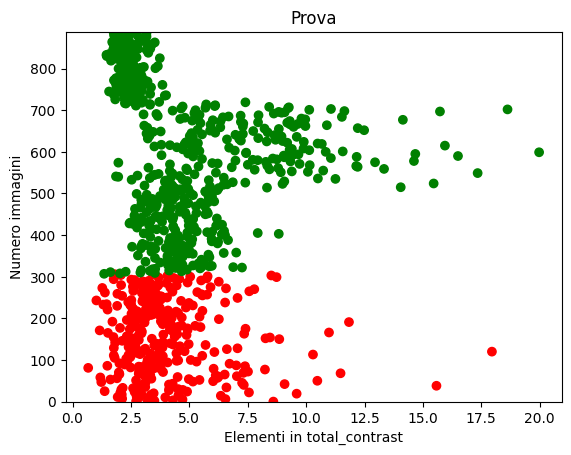

In [ ]:
import matplotlib.pyplot as plt

total_contrast = contrast_real+contrast_fake
total_label = real_label+fake_label

print("la size dei total contrast è",len(total_contrast))
print("la size dei total label è",len(total_label))

indexes = np.arange(len(total_contrast))

plt.scatter(total_contrast,indexes, c =['red' if b == "real" else 'green' for b in total_label])

plt.xlabel('Elementi in total_contrast')
plt.ylabel('Numero immagini')
plt.title('Prova')
plt.ylim(0,len(total_contrast)+1)
plt.show()